In [1]:
import sys
sys.path.append('../scripts')
import numpy as np
import pandas as pd
from datetime import date
from preprocess import load_data,drop_column,find_columns_with_missing_value, find_outliers, find_and_replace_outliers_with_median, IQR_outlier, normalize_date,convert_money_tofloat
from plots import plot_boxplot, plot_histogram, correlation_matrix


Reads the dataset from a pipe-delimited text file into a pandas DataFrame for further processing and analysis.

In [2]:

data = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|', low_memory=True)

/tmp/ipykernel_30544/1932522880.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|', low_memory=True)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

## remove columns with more than 70% missing data

In [4]:
drop_column(data, ['NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate'])

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


### Data Normalization and Conversion

We normalized the `TransactionMonth` and `VehicleIntroDate` columns to ensure consistent date formats. Additionally, the `CapitalOutstanding` column was converted to a numeric type after applying a custom money-to-float conversion function. This preprocessing step prepares the data for further analysis and visualization.

In [5]:
data = normalize_date(data,'TransactionMonth')
data = normalize_date(data, 'VehicleIntroDate')

data['CapitalOutstanding'] = pd.to_numeric(data['CapitalOutstanding'].apply(convert_money_tofloat))

/home/mikiask/anotherproject/Insurance-Risk-Analytics-Predictive-Modeling/notebooks/../scripts/preprocess.py:159: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col]).dt.normalize()


### Clearning missing data
To handle missing data, we filled missing values in categorical columns with 'Not specified' and calculated the vehicle age using the current year and the registration year. This ensures that subsequent analyses are not affected by missing or inconsistent entries.

In [6]:

data['MaritalStatus'] = data['MaritalStatus'].fillna('Not specified')
data['Gender'] = data['Gender'].fillna('Not specified')
data['Bank'] = data['Bank'].fillna('Not specified')
data['Citizenship'] = data['Citizenship'].replace(r'^\s*$', 'Not specified', regex=True)
data['VehicleType'] = data['VehicleType'].fillna('Not specified')
data['WrittenOff'] = data['WrittenOff'].fillna('Not specified')
data['Rebuilt'] = data['Rebuilt'].fillna('Not specified')
data['Converted'] = data['Converted'].fillna('Not specified')
data['NewVehicle'] = data['NewVehicle'].fillna('Not specified')
data['AccountType'] = data['AccountType'].fillna('Not specified')
data['make'] = data['make'].fillna('Not specified')
data['Model'] = data['Model'].fillna('Not specified')
data['bodytype'] = data['bodytype'].fillna('Not specified')
data['VehicleAge'] = date.today().year - data['RegistrationYear']



Identifies columns in the dataset that contain missing values, helping to target further data cleaning steps.

In [14]:
find_columns_with_missing_value(data)


columns above the threshold


['mmcode',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'NumberOfDoors',
 'VehicleIntroDate']

## Finding outliners

In [7]:
outliners = find_outliers(data, 3)

Found 1961 outliers in column 'UnderwrittenCoverID'.
No outliers found in column 'PolicyID' using z-score threshold 3.
Found 5023 outliers in column 'IsVATRegistered'.
No outliers found in column 'PostalCode' using z-score threshold 3.
Found 54514 outliers in column 'mmcode'.
Found 7482 outliers in column 'RegistrationYear'.
Found 34262 outliers in column 'Cylinders'.
Found 5669 outliers in column 'cubiccapacity'.
Found 2725 outliers in column 'kilowatts'.
Found 29647 outliers in column 'NumberOfDoors'.
Found 320 outliers in column 'CapitalOutstanding'.
Found 51 outliers in column 'SumInsured'.
Found 743 outliers in column 'CalculatedPremiumPerTerm'.
Found 12470 outliers in column 'TotalPremium'.
Found 1312 outliers in column 'TotalClaims'.
Found 7482 outliers in column 'VehicleAge'.


In [48]:
outliners

['UnderwrittenCoverID',
 'IsVATRegistered',
 'mmcode',
 'RegistrationYear',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'NumberOfDoors',
 'CapitalOutstanding',
 'SumInsured',
 'CalculatedPremiumPerTerm',
 'TotalPremium',
 'TotalClaims']

In [11]:

data = find_and_replace_outliers_with_median(data, ['CapitalOutstanding', 'SumInsured','CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims'], 3)
#data =IQR_outlier(data, ['TotalPremium'])

Processing columns: ['CapitalOutstanding', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
Found 11410 outliers in column 'CapitalOutstanding'.
Median value for 'CapitalOutstanding' (used for replacement): 0.0
Outliers in column 'CapitalOutstanding' replaced with median.
No outliers found in column 'SumInsured' using z-score threshold 3.
Found 37697 outliers in column 'CalculatedPremiumPerTerm'.
Median value for 'CalculatedPremiumPerTerm' (used for replacement): 8.4369
Outliers in column 'CalculatedPremiumPerTerm' replaced with median.
Found 39382 outliers in column 'TotalPremium'.
Median value for 'TotalPremium' (used for replacement): 2.178333333333
Outliers in column 'TotalPremium' replaced with median.
Found 54 outliers in column 'TotalClaims'.
Median value for 'TotalClaims' (used for replacement): 0.0
Outliers in column 'TotalClaims' replaced with median.


### Create Box plots from numerical variables 

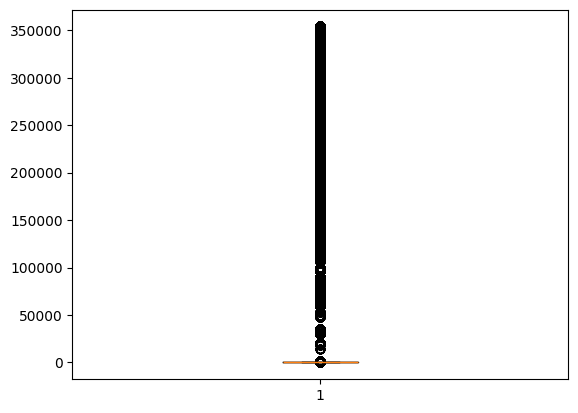

<Figure size 1000x700 with 0 Axes>

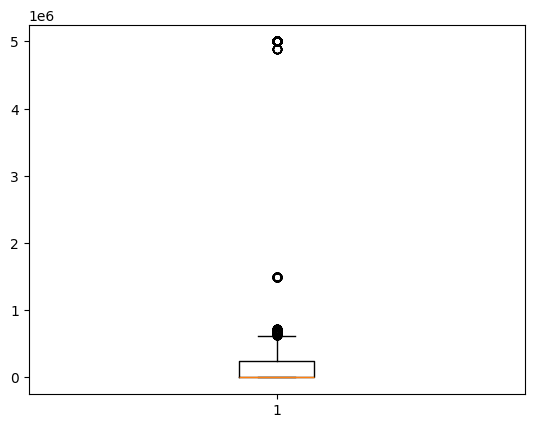

<Figure size 1000x700 with 0 Axes>

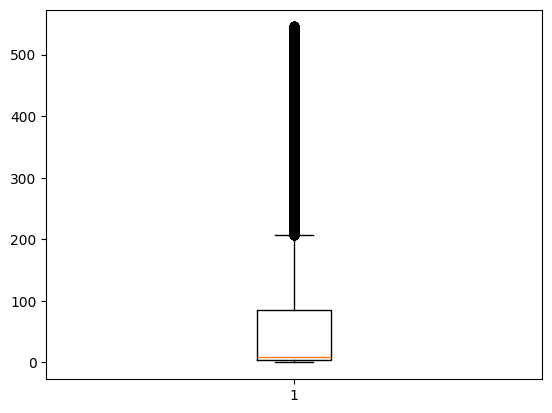

<Figure size 1000x700 with 0 Axes>

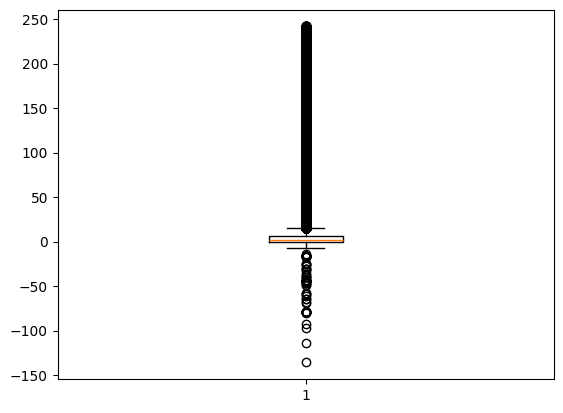

<Figure size 1000x700 with 0 Axes>

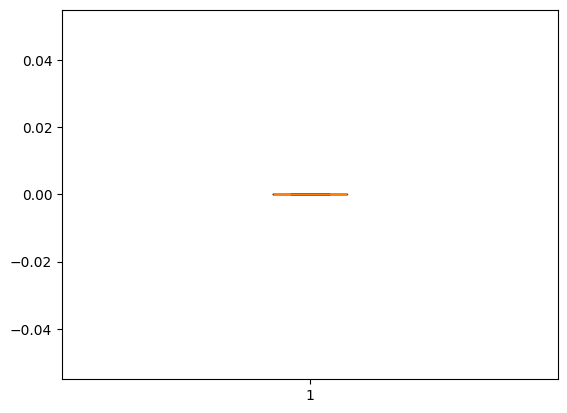

<Figure size 1000x700 with 0 Axes>

In [15]:
plot_boxplot(data,['CapitalOutstanding', 'SumInsured','CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims'])

### Create Histogram from Categorical variables

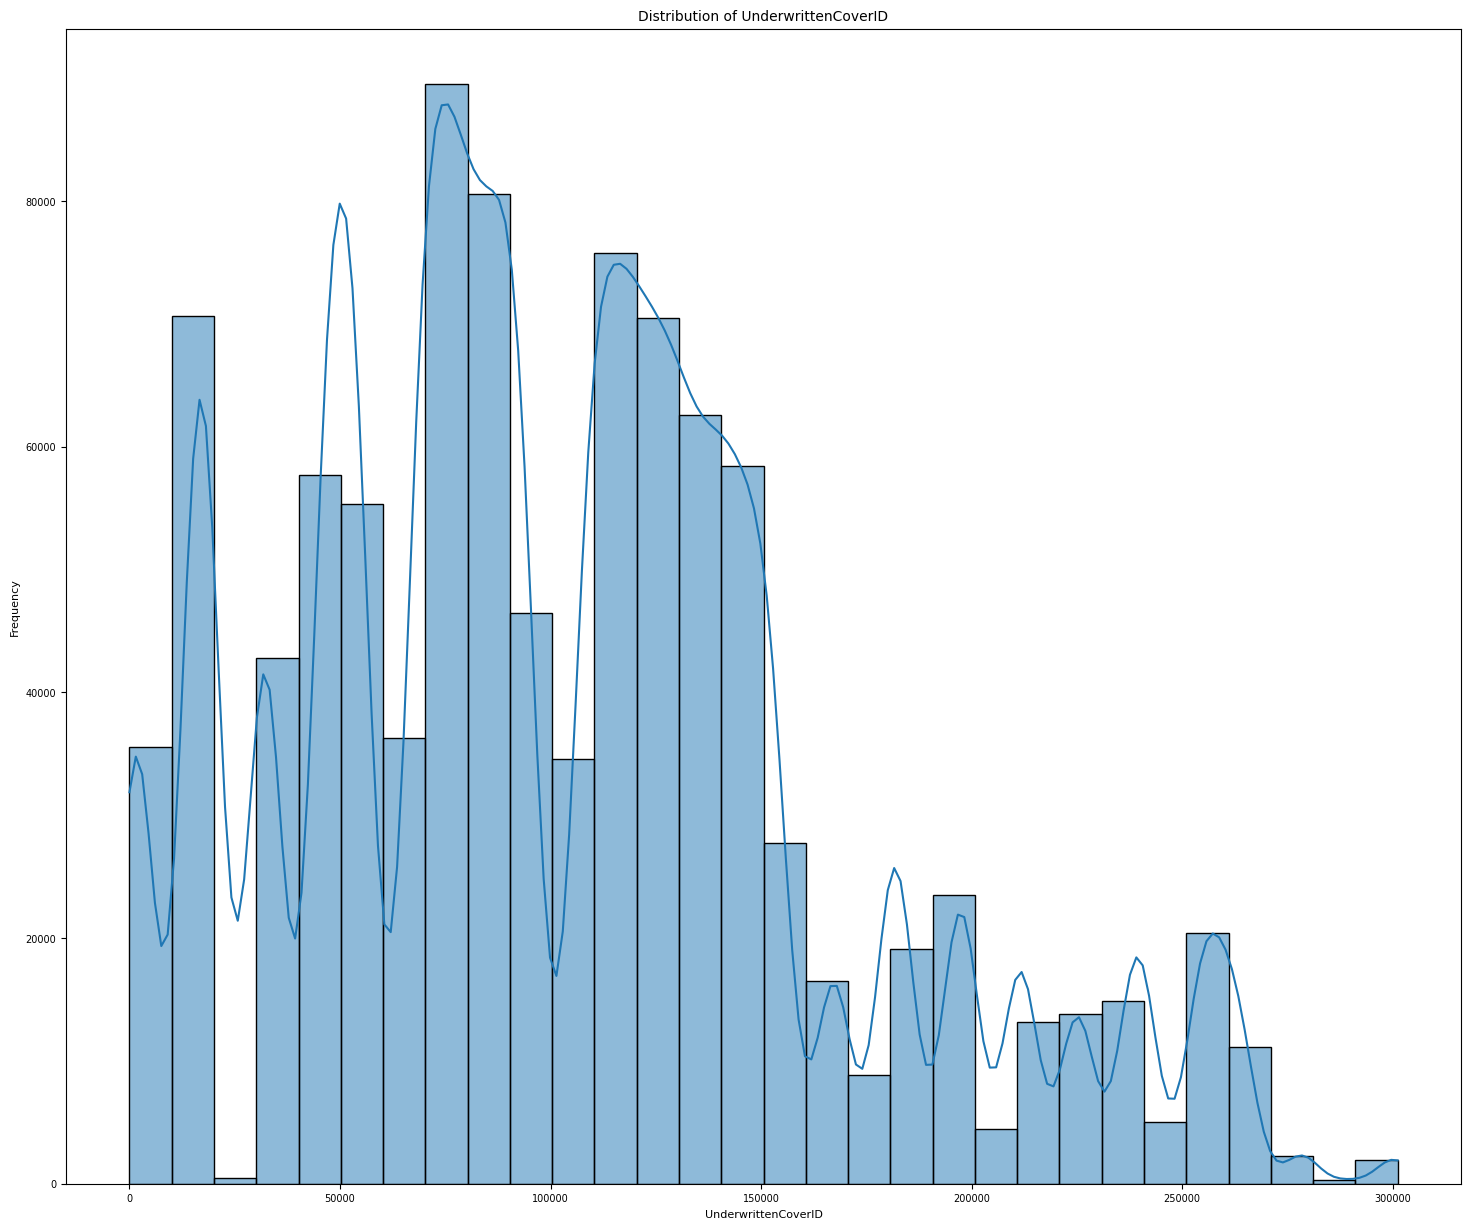

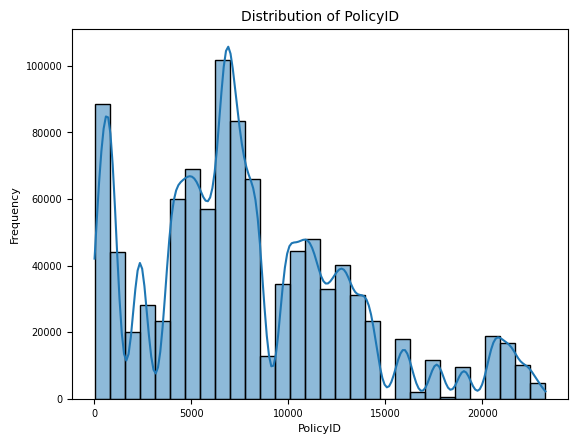

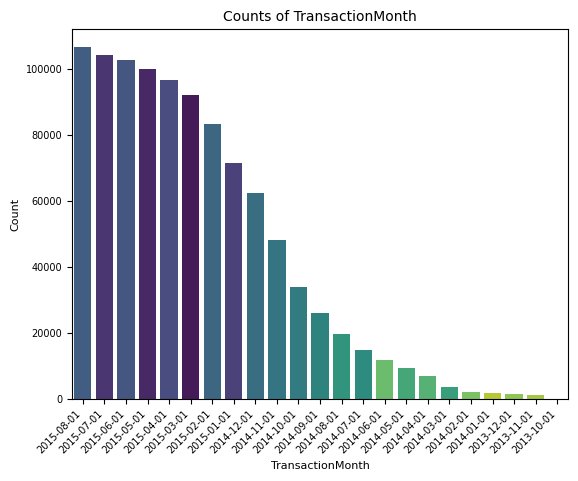

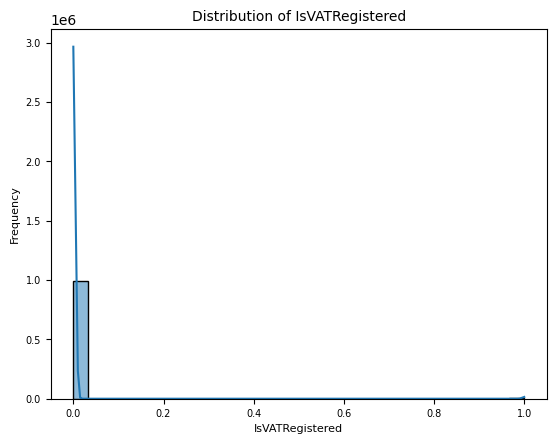

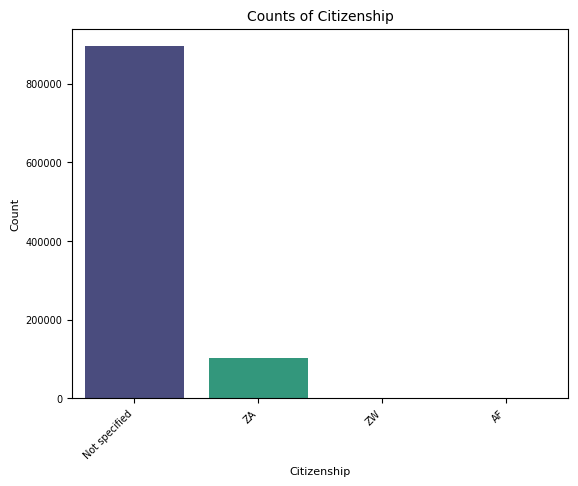

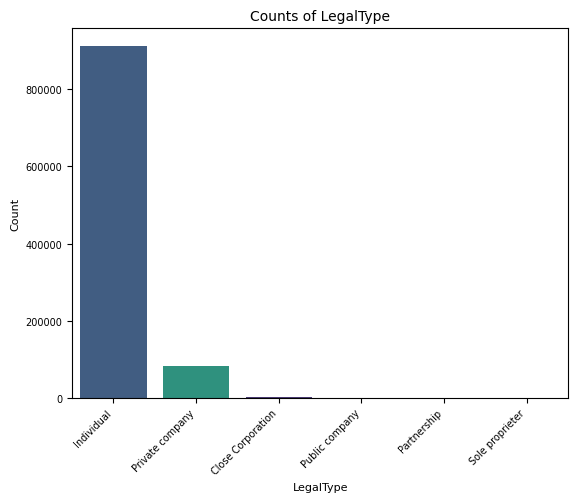

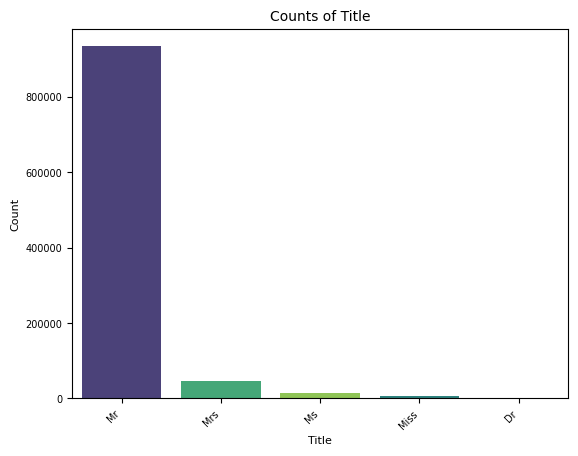

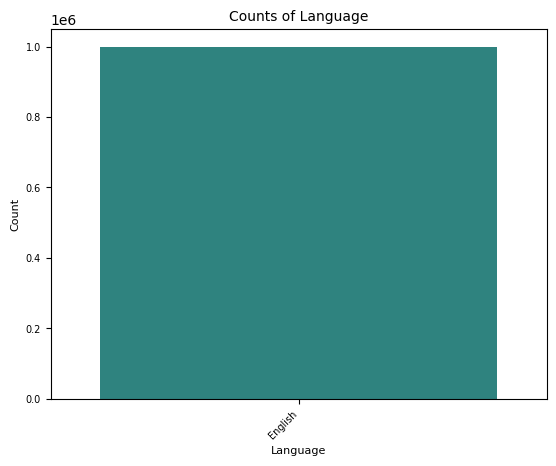

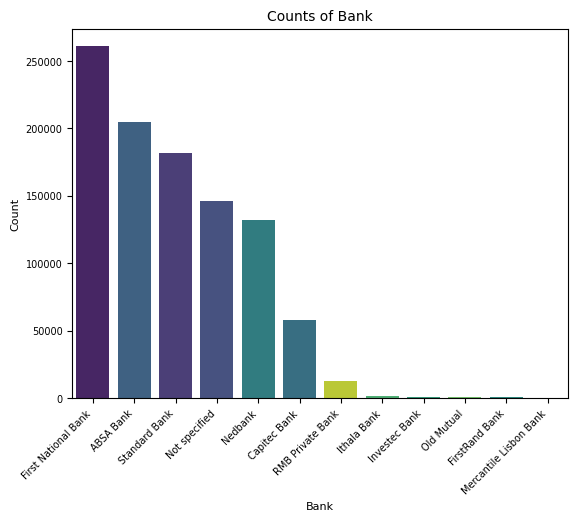

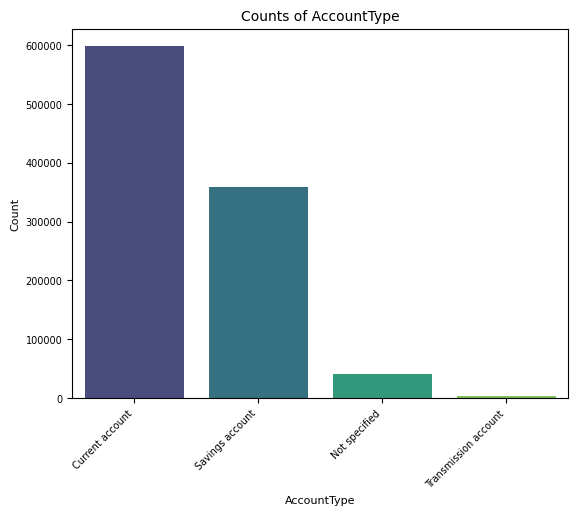

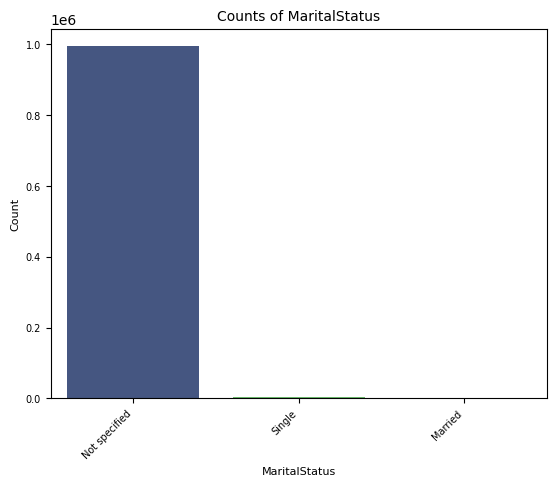

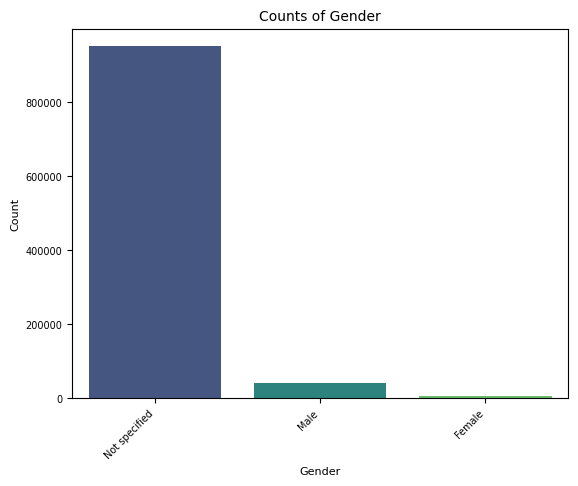

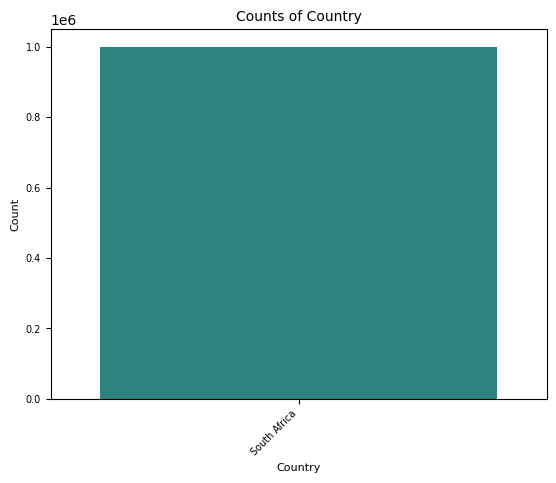

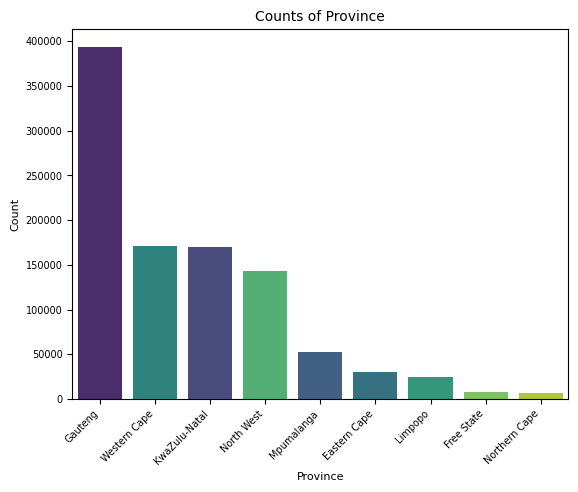

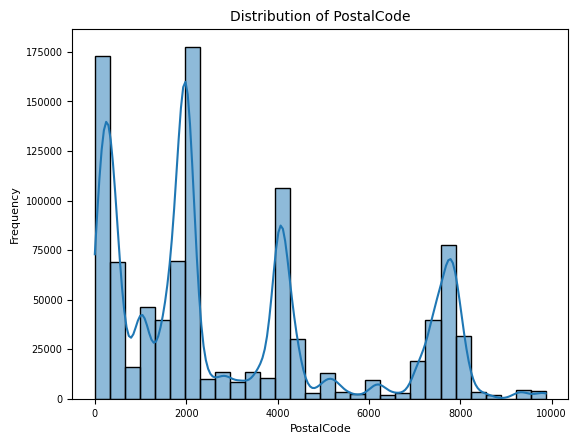

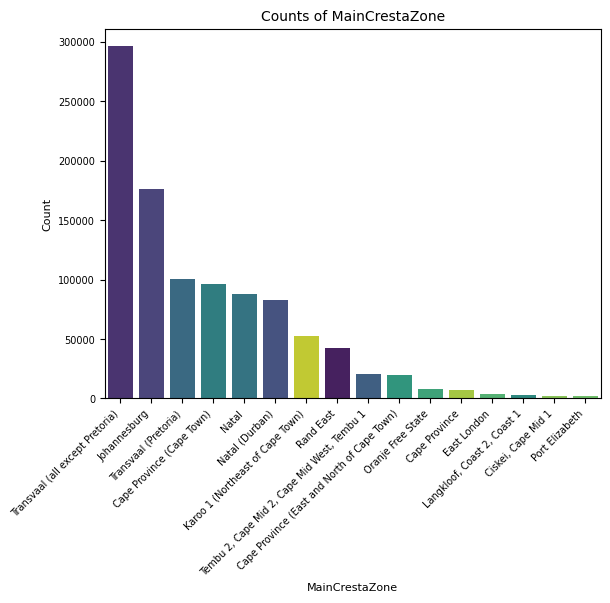

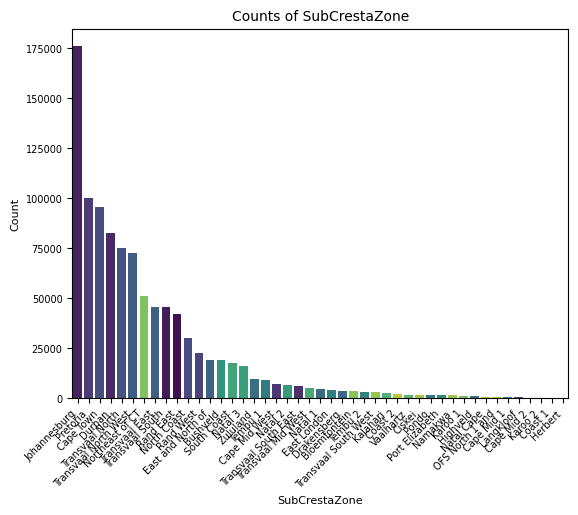

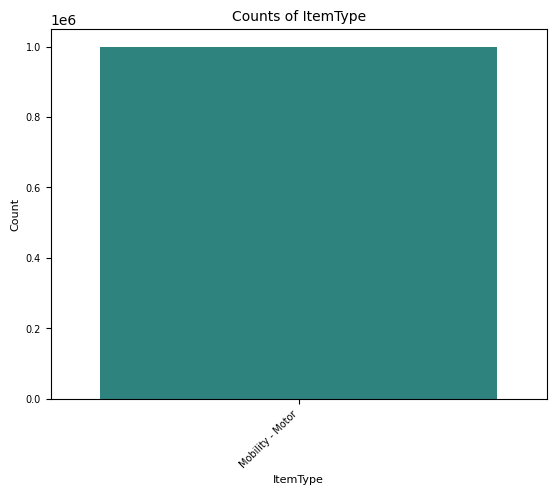

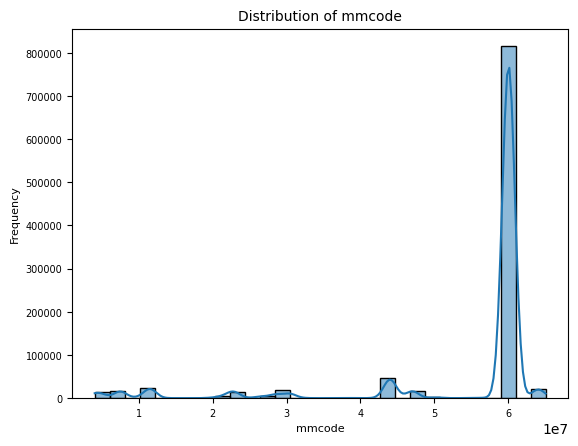

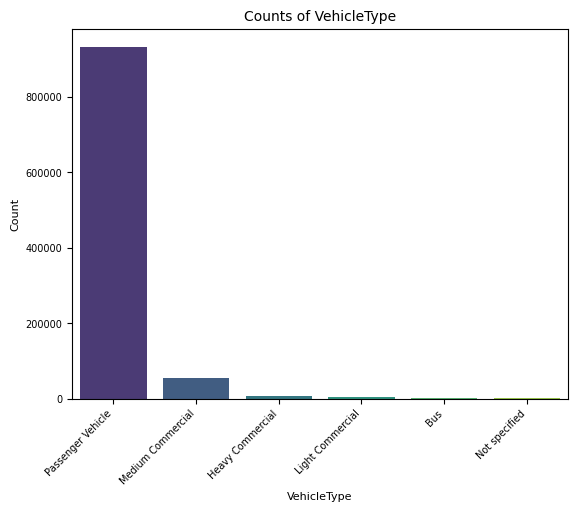

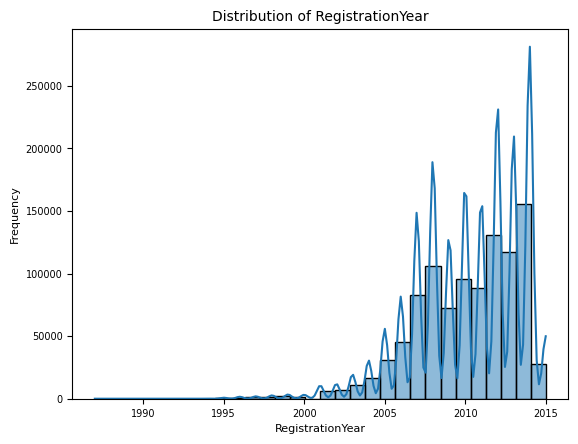

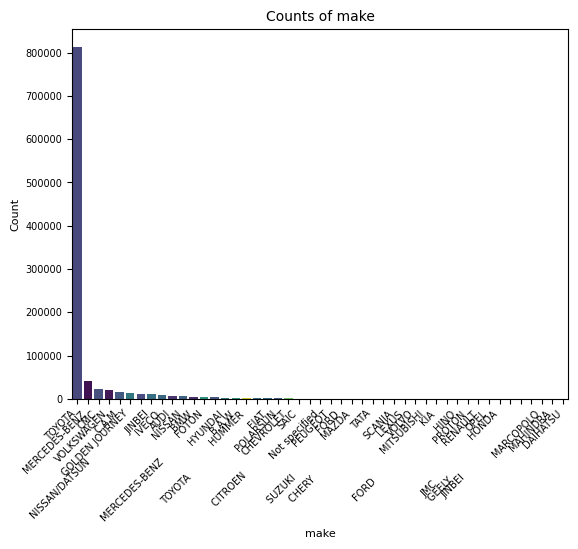

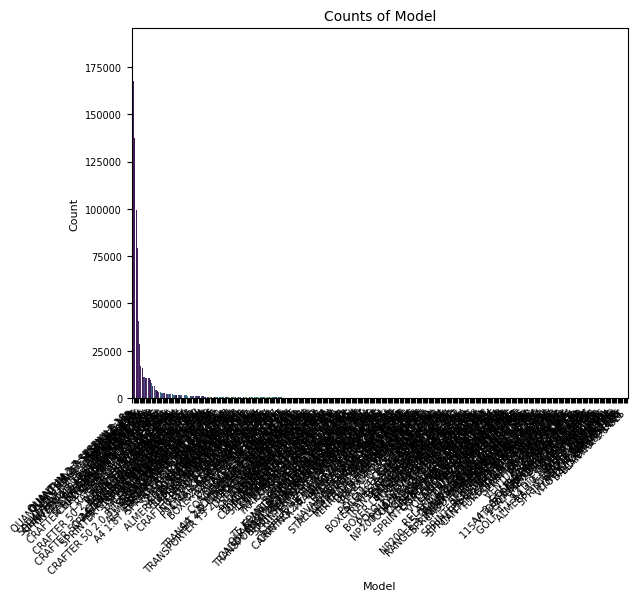

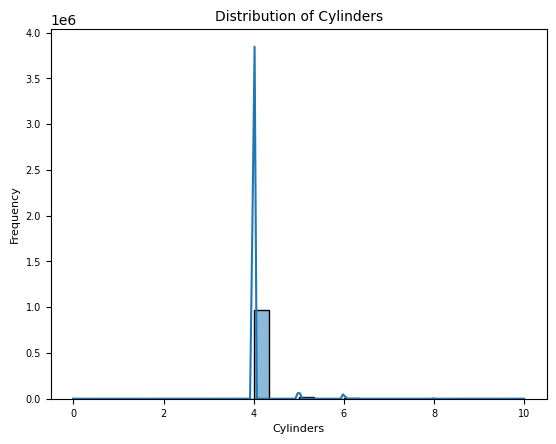

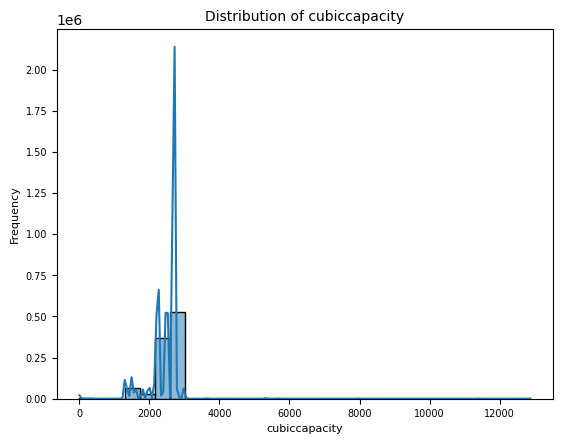

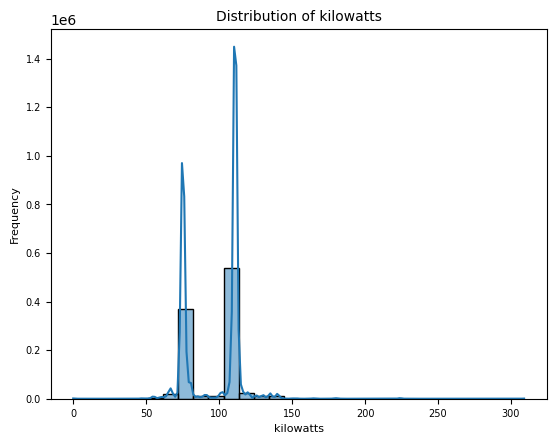

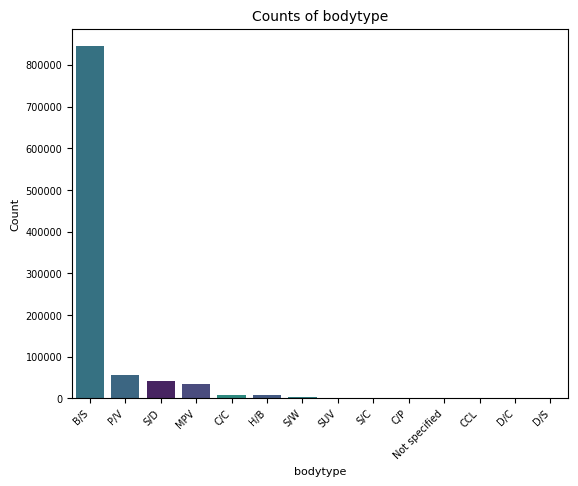

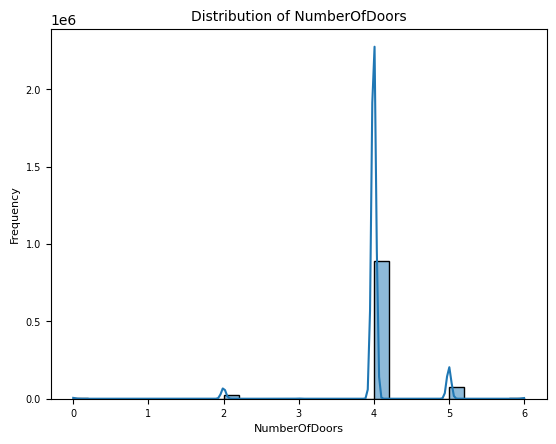

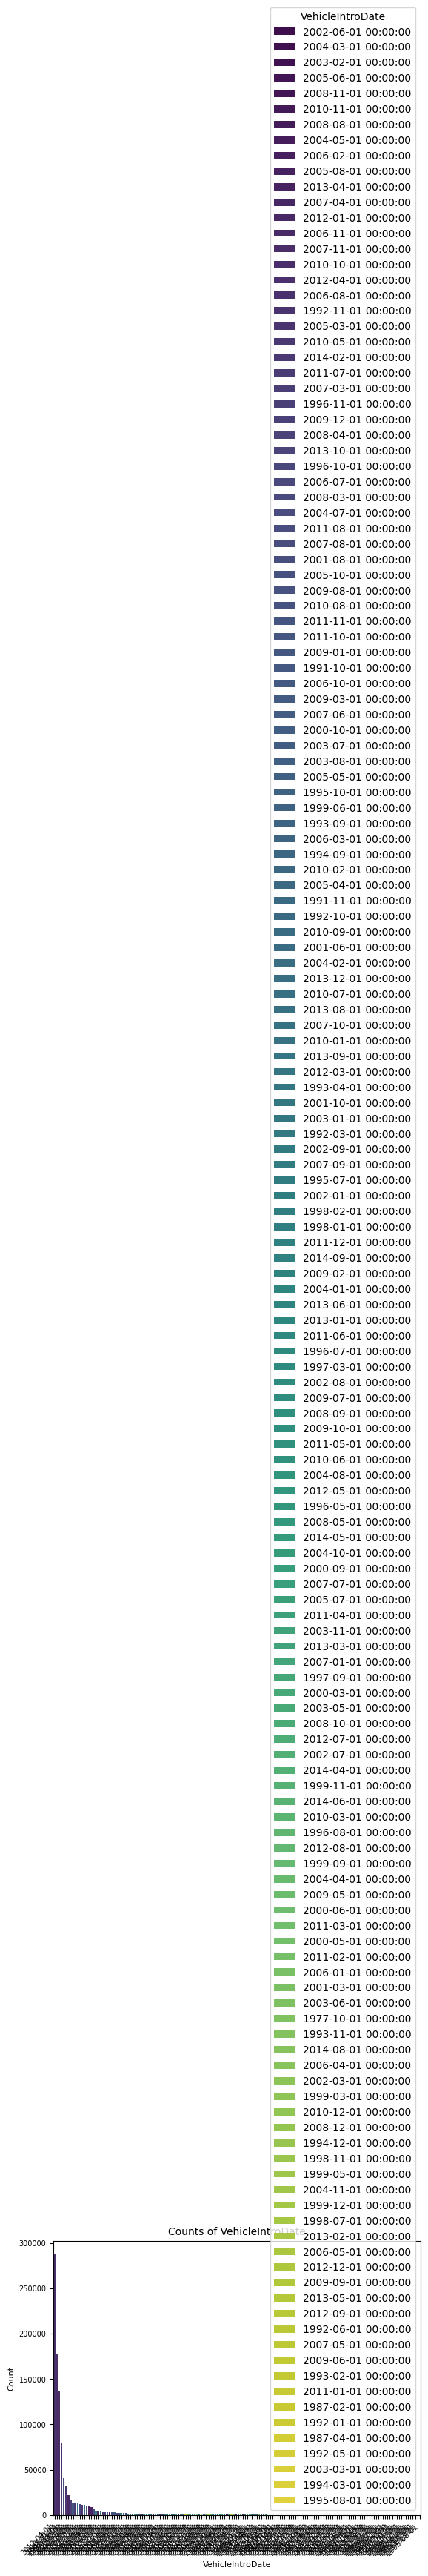

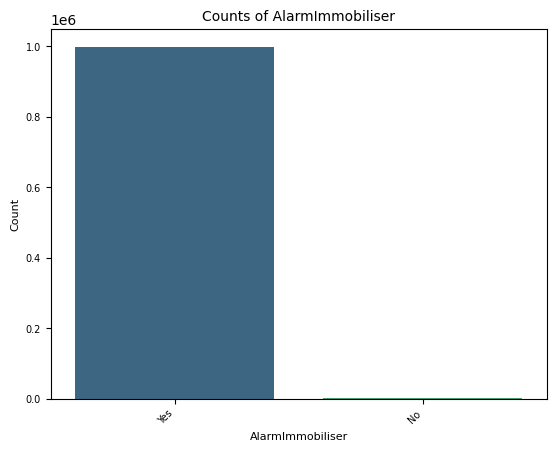

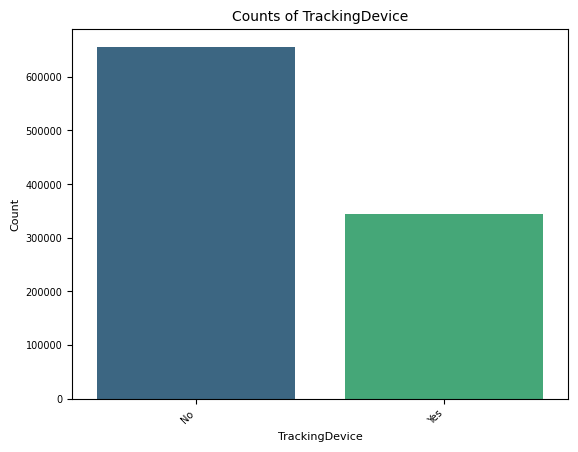

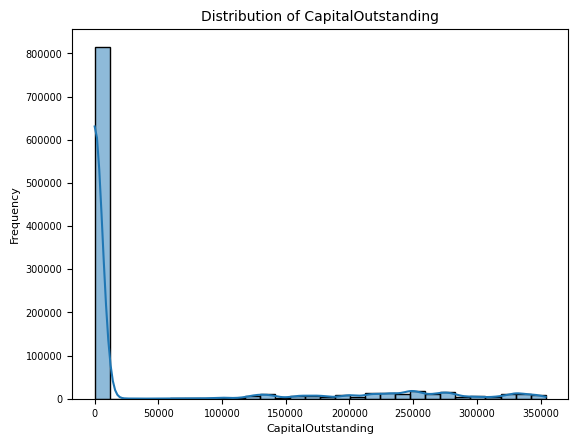

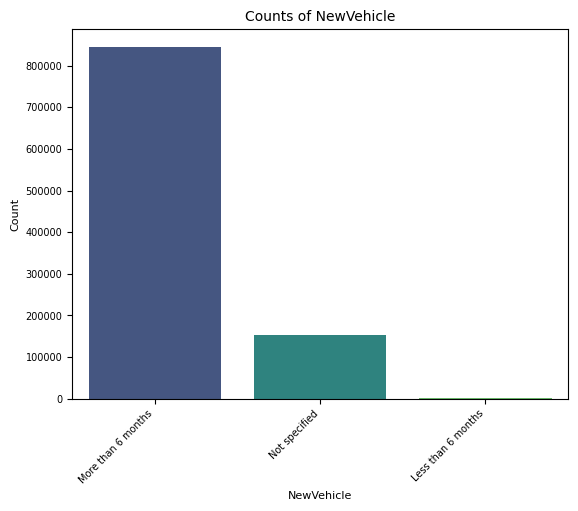

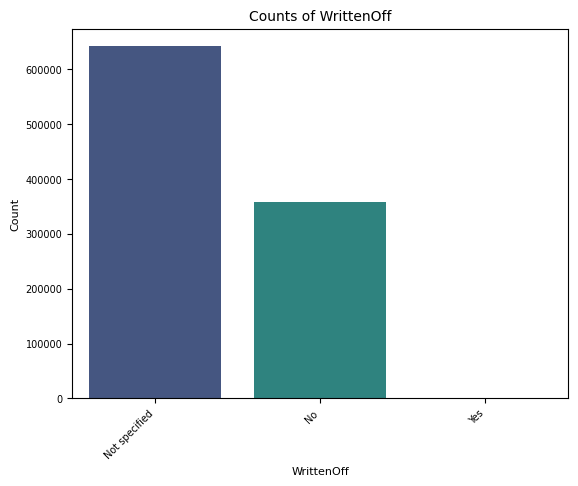

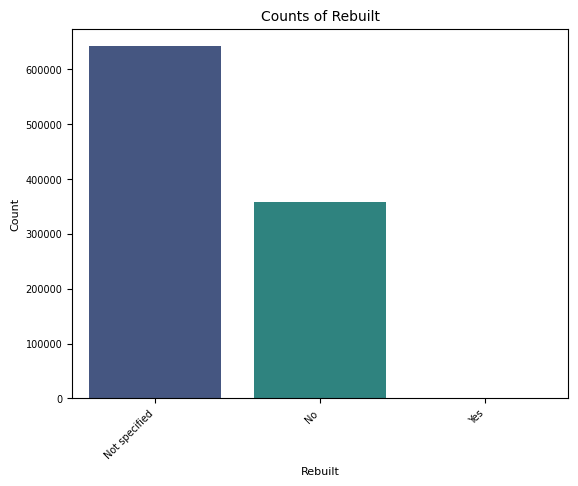

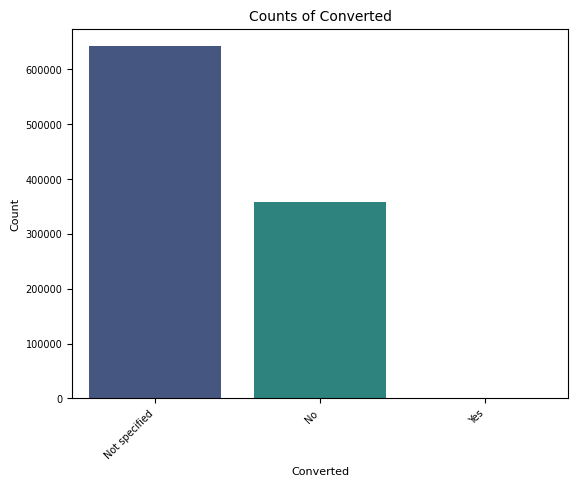

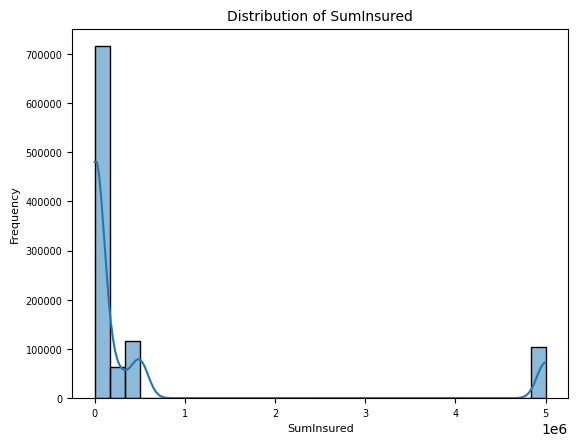

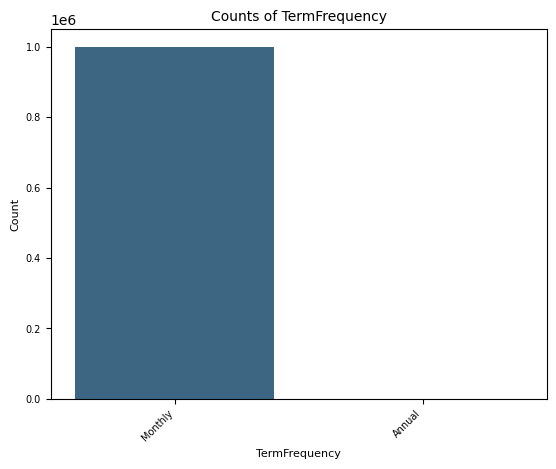

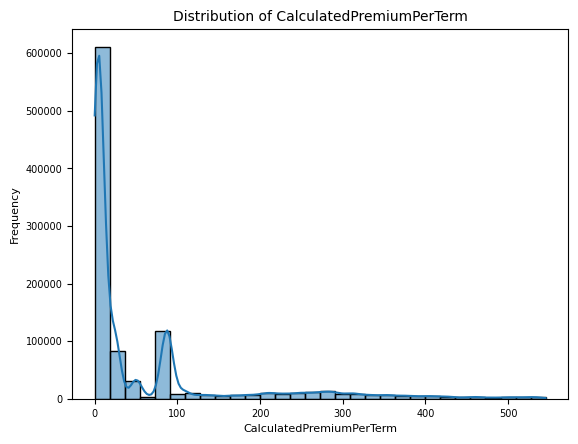

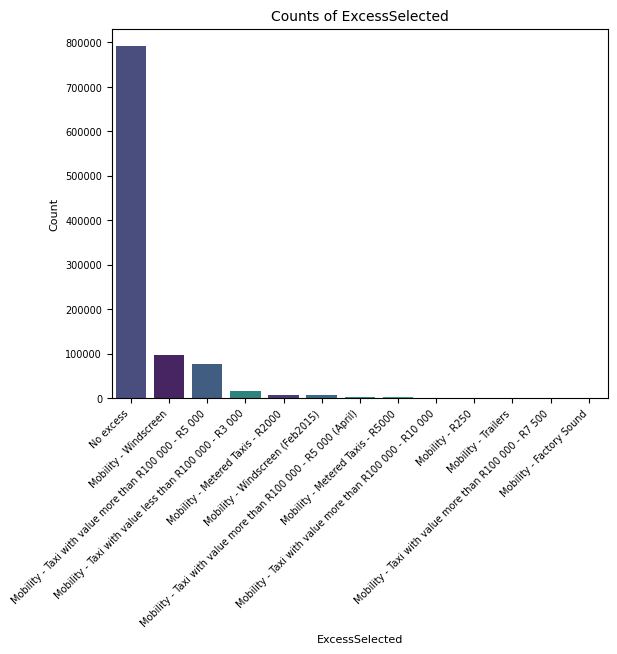

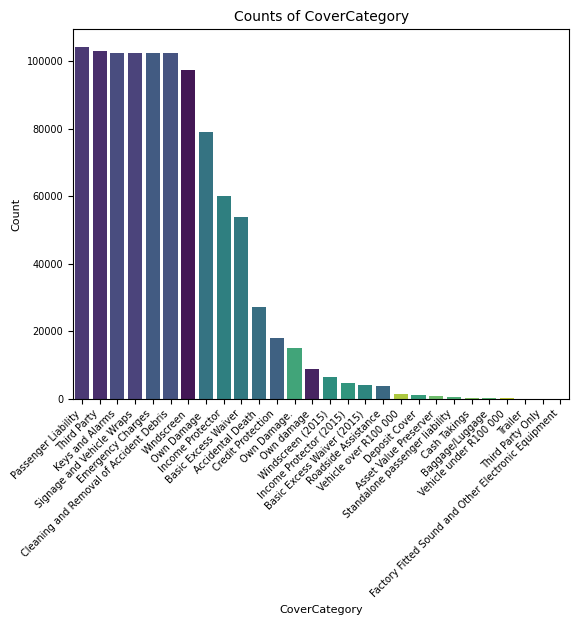

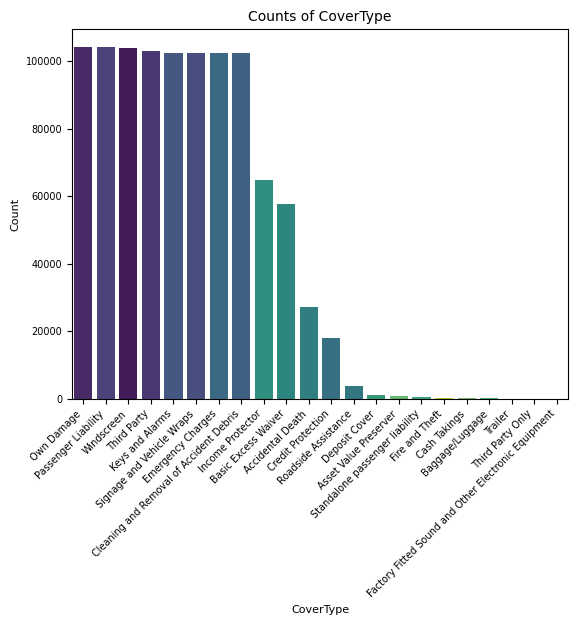

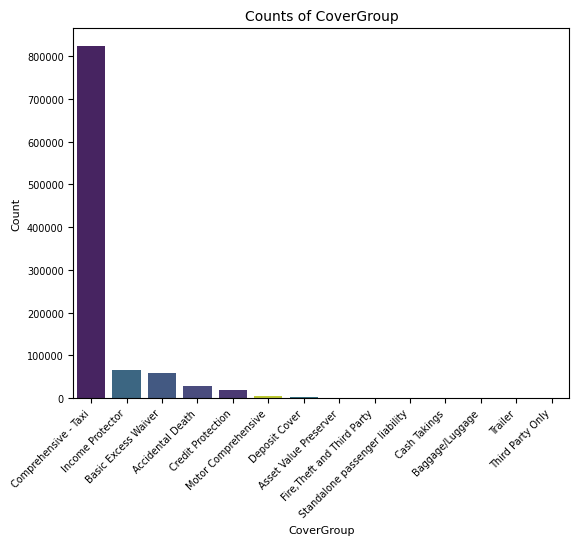

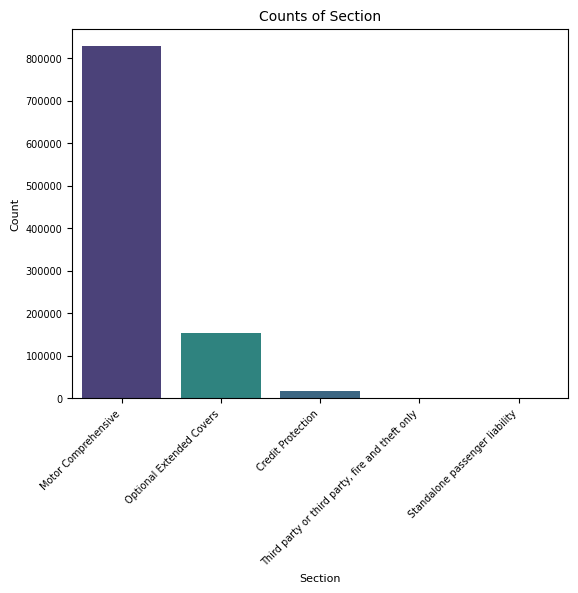

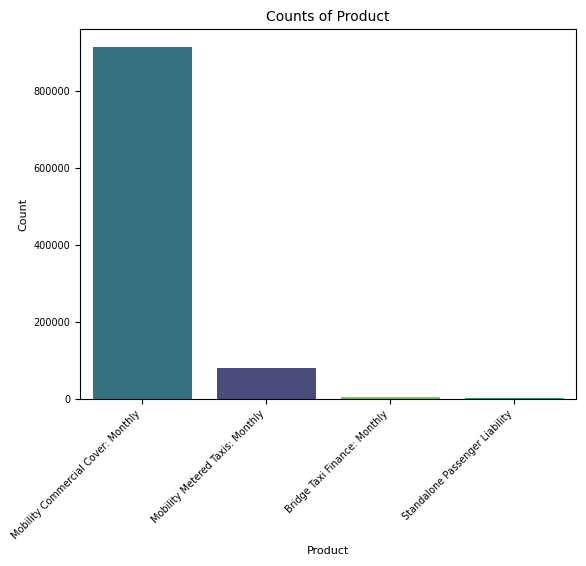

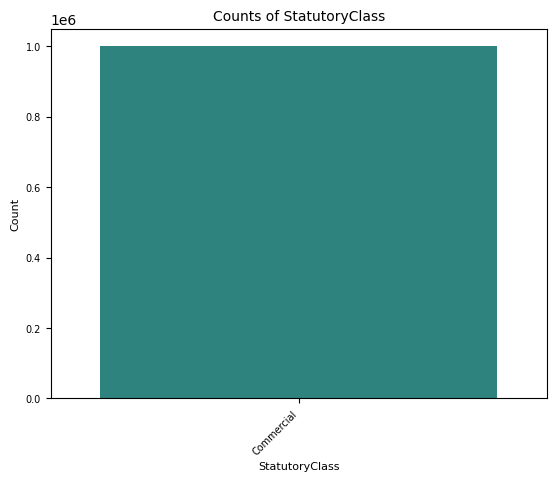

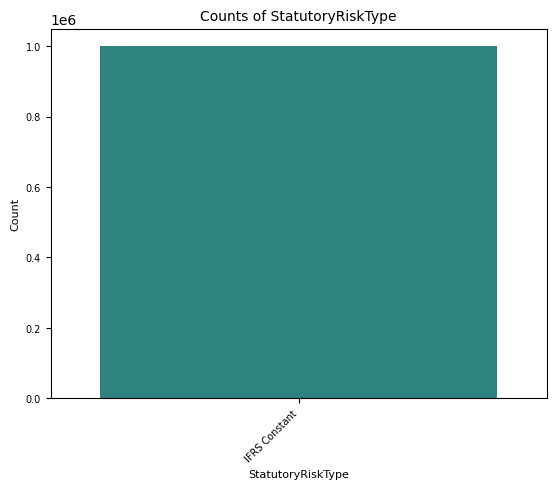

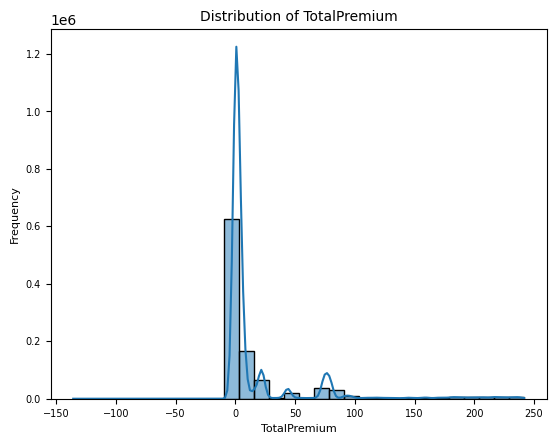

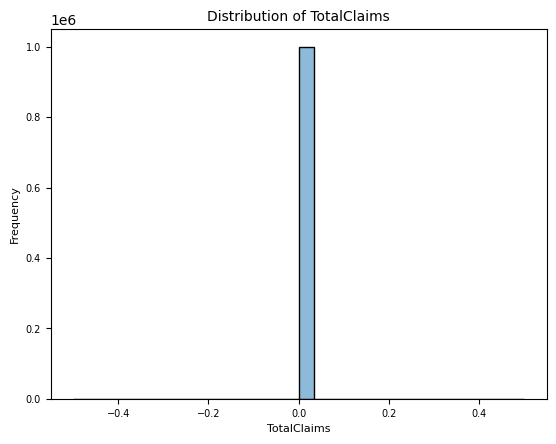

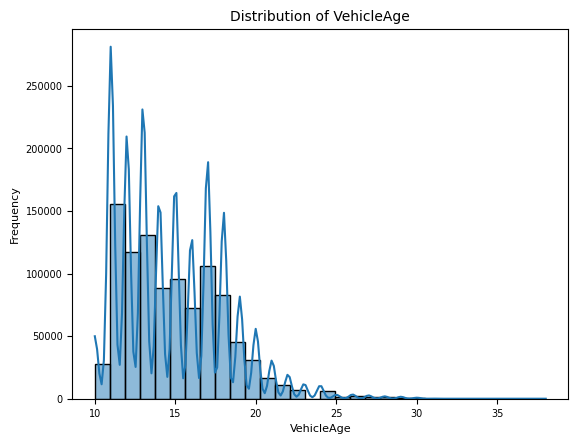

In [16]:
plot_histogram(data,[])

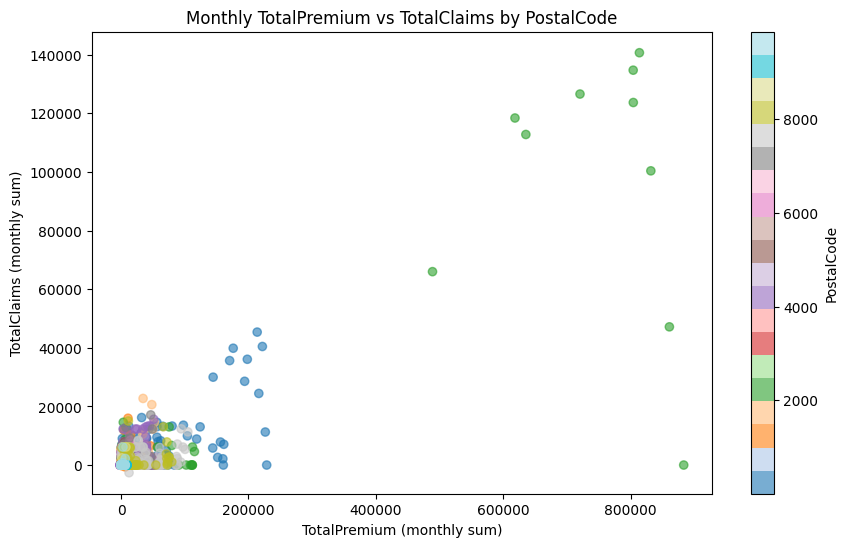

Correlation matrix (TotalPremium vs TotalClaims by PostalCode):
              TotalPremium  TotalClaims
TotalPremium      1.000000     0.964866
TotalClaims       0.964866     1.000000


In [51]:
import matplotlib.pyplot as plt

# Group by PostalCode and TransactionMonth, then aggregate TotalPremium and TotalClaims by sum
monthly_postal = data.groupby(['PostalCode', 'TransactionMonth'])[['TotalPremium', 'TotalClaims']].sum().reset_index()

# Scatter plot: TotalPremium vs TotalClaims, colored by PostalCode
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    monthly_postal['TotalPremium'],
    monthly_postal['TotalClaims'],
    c=monthly_postal['PostalCode'],
    cmap='tab20',
    alpha=0.6
)
plt.xlabel('TotalPremium (monthly sum)')
plt.ylabel('TotalClaims (monthly sum)')
plt.title('Monthly TotalPremium vs TotalClaims by PostalCode')
plt.colorbar(scatter, label='PostalCode')
plt.show()

# Correlation matrix for TotalPremium and TotalClaims per PostalCode
corr_by_postal = monthly_postal.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].sum().corr()
print("Correlation matrix (TotalPremium vs TotalClaims by PostalCode):")
print(corr_by_postal)

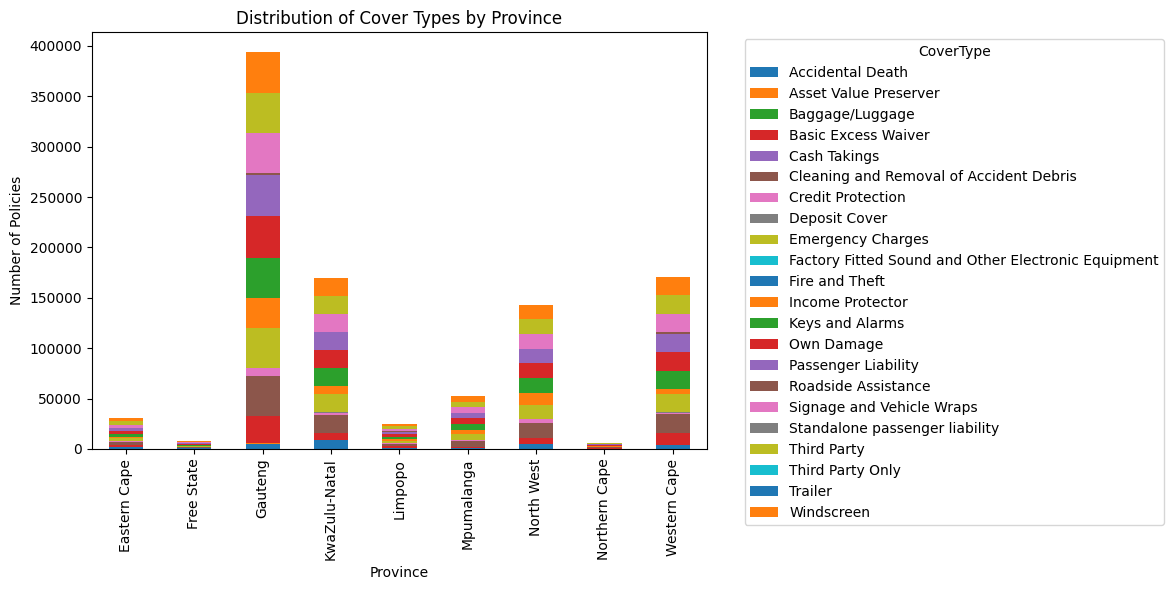

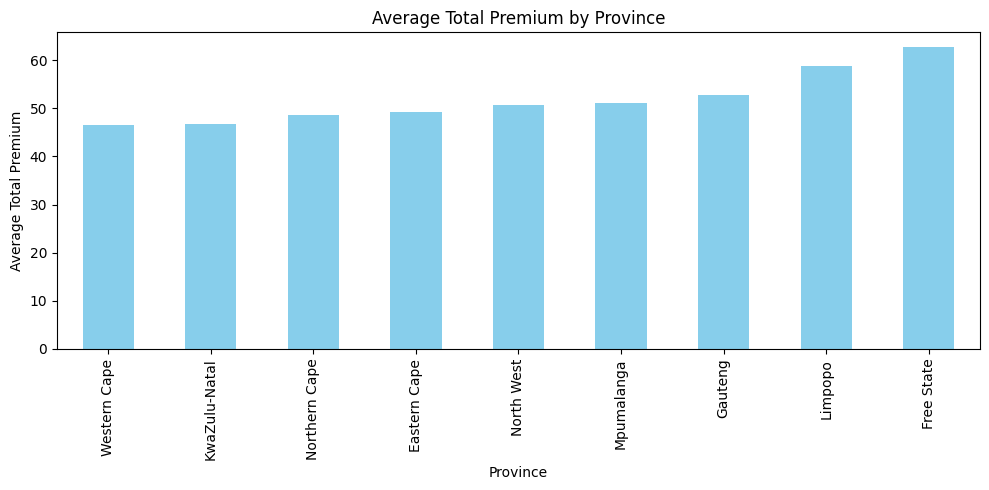

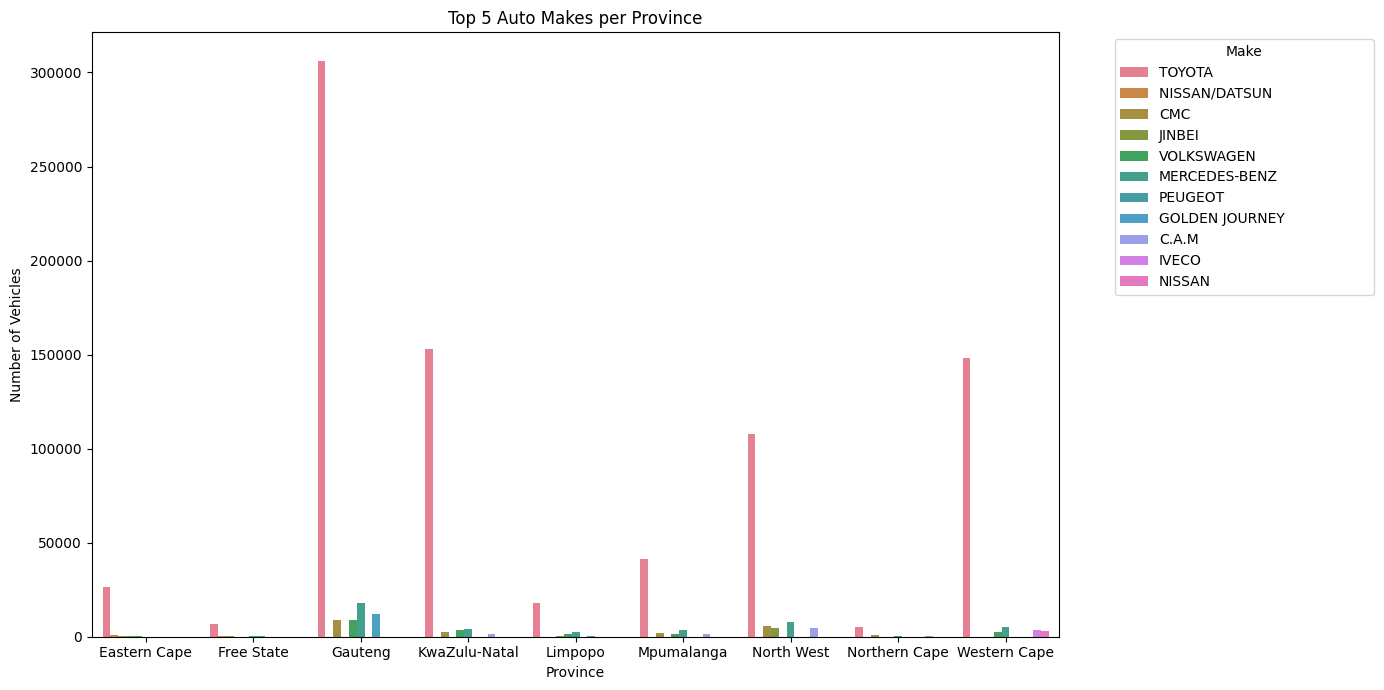

In [52]:
import seaborn as sns

# Group by Province and CoverType to see the distribution of cover types across provinces
covertype_by_province = data.groupby(['Province', 'CoverType']).size().unstack(fill_value=0)

# Plot the distribution of CoverType by Province
covertype_by_province.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Cover Types by Province')
plt.xlabel('Province')
plt.ylabel('Number of Policies')
plt.legend(title='CoverType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Average TotalPremium by Province
avg_premium_by_province = data.groupby('Province')['TotalPremium'].mean().sort_values()

# Plot average premium by province
avg_premium_by_province.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Average Total Premium by Province')
plt.xlabel('Province')
plt.ylabel('Average Total Premium')
plt.tight_layout()
plt.show()

# Top 5 auto makes per province
top_makes_by_province = data.groupby(['Province', 'make']).size().reset_index(name='count')
top_makes = top_makes_by_province.sort_values(['Province', 'count'], ascending=[True, False]).groupby('Province').head(5)

# Plot top 5 makes per province
plt.figure(figsize=(14, 7))
sns.barplot(data=top_makes, x='Province', y='count', hue='make')
plt.title('Top 5 Auto Makes per Province')
plt.xlabel('Province')
plt.ylabel('Number of Vehicles')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

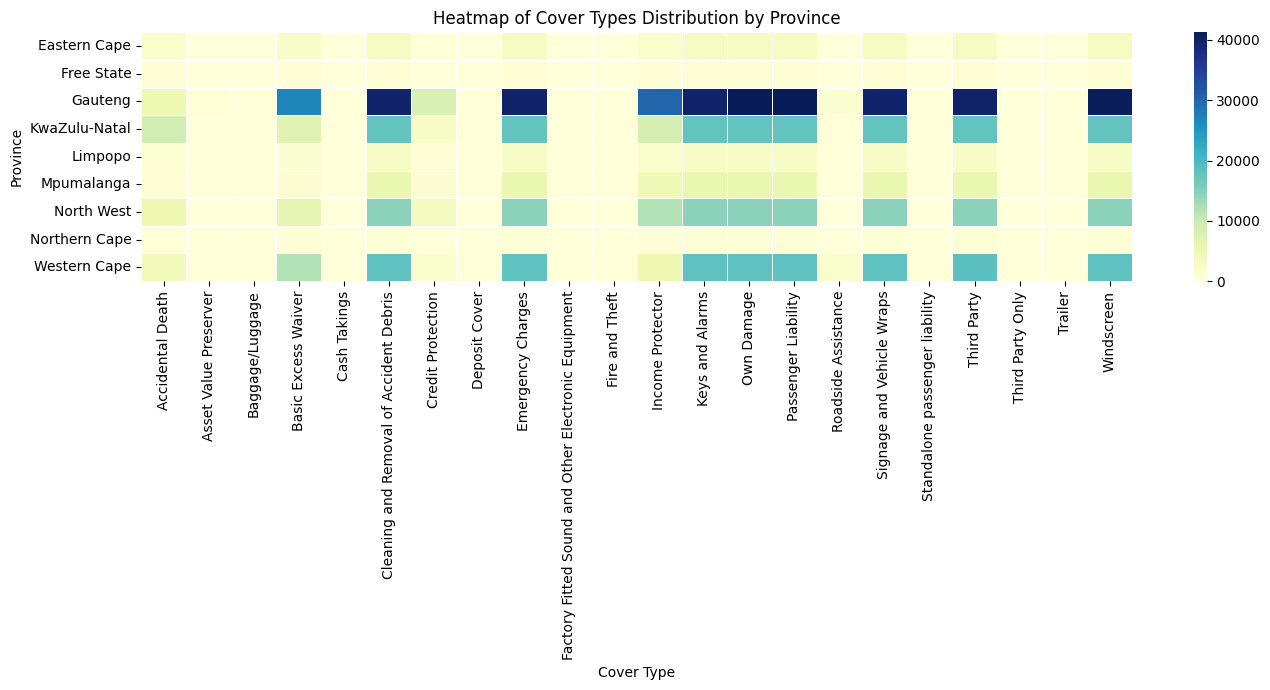

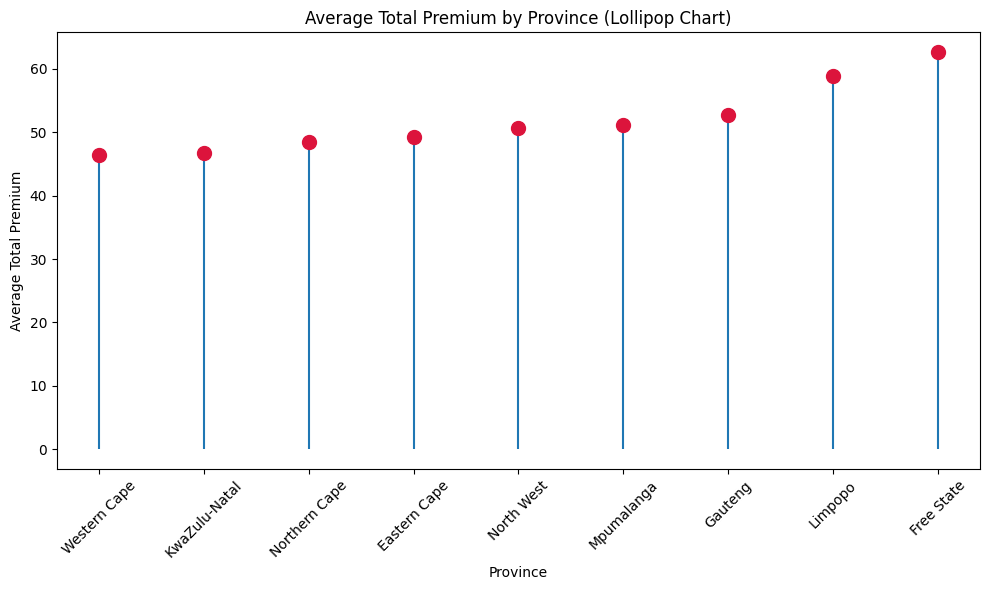

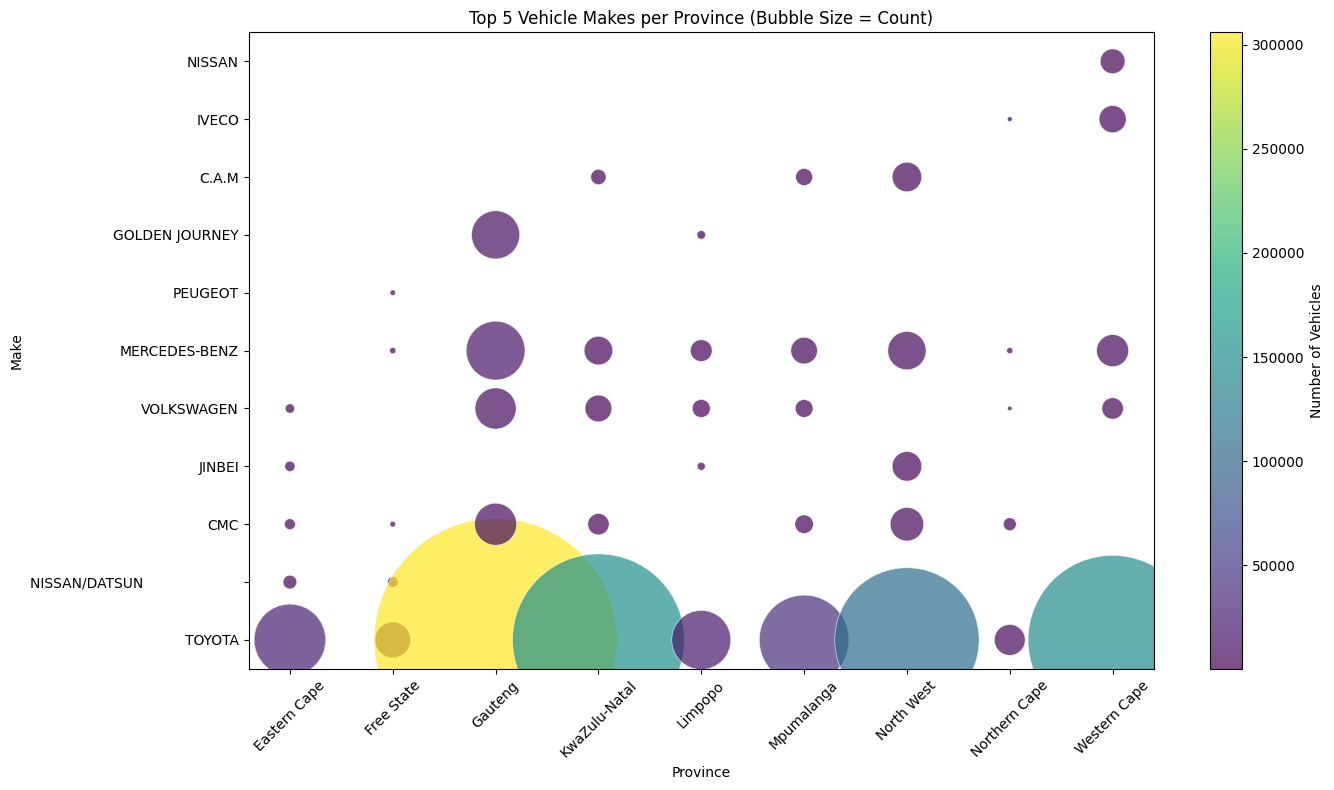

In [53]:
# 1. Heatmap: CoverType distribution across Provinces
plt.figure(figsize=(14, 7))
sns.heatmap(covertype_by_province, cmap="YlGnBu", annot=False, linewidths=.5)
plt.title('Heatmap of Cover Types Distribution by Province')
plt.xlabel('Cover Type')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

# 2. Lollipop Chart: Average Premium by Province
plt.figure(figsize=(10, 6))
sorted_avg = avg_premium_by_province.sort_values()
plt.stem(sorted_avg.index, sorted_avg.values, basefmt=" ")
plt.scatter(sorted_avg.index, sorted_avg.values, color='crimson', s=100, zorder=3)
plt.title('Average Total Premium by Province (Lollipop Chart)')
plt.xlabel('Province')
plt.ylabel('Average Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Bubble Plot: Top 5 Makes per Province (Province vs Make, bubble size = count)
plt.figure(figsize=(14, 8))
bubble = plt.scatter(
    top_makes['Province'],
    top_makes['make'],
    s=top_makes['count'] / 10,  # scale for visibility
    c=top_makes['count'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5
)
plt.title('Top 5 Vehicle Makes per Province (Bubble Size = Count)')
plt.xlabel('Province')
plt.ylabel('Make')
plt.xticks(rotation=45)
cbar = plt.colorbar(bubble)
cbar.set_label('Number of Vehicles')
plt.tight_layout()
plt.show()

In [18]:
data.to_csv('../data/MachineLearningRating_v3.csv')